### Business Analytics Group Assignment - Predicting Airbnb Listing Prices in Melbourne__ {-}

--- 

**Kaggle Competition Ends:** Friday, 2 June 2023 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 2 June 2023 @ 11.59pm (Week 13)   

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict listed prices of Airbnb properties in Melbourne based on various Airbnb characteristics and regression models
- Assessment Summary:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new explanatory variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts and submit your predictions to Kaggle  
    - Each member of the team will record a video presentation of their work  
    - Marks will be awarded producing a prediction in the top 5 positions of their unit as well as for reaching the highest ranking on Kaggle amongst all teams.

**Instructions:** 

- Form a team of 3 students (minimum 2 students)  
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team in the competition [https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12](https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12)
    - Team leader to click on `team` and join and invite other team members to join
    - Your **team's name must start** with your unit code, for instance you could have a team called BUSA8001_masterful_geniuses or BUSA3020_l33t 
- All team members should work on all the tasks listed below however   
    - Choose a team member who will be responsible for one of each of the 3 tasks listed below    
- Your predictions must be generated by a model you develop here 
    - You will receive a mark of zero if your code provided here does not produce the forecasts you submit to Kaggle

**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 

**Competition Marks:**  

- 1 mark: Ranking in the top 5 places of your unit on Kaggle (make sure you name your team as instructed above)   
- 2 marks: Reaching the first place in your unit (make sure you name your team as instructed above)   


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Can do this as many times as necessary while building their model  
2. On iLearn **only team leader to submit** this Jupyter notebook re-named `Group_Assignment_Team_Name.ipynb` where Team_Name is your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and team name in the competition
    - Provide answers to the 3 Tasks below in the allocated cells including all codes/outputs/writeups 
    - One 15 minute video recording of your work 
        - Each team member to provide a 5 minute presentation of the Task that they led (it is best to jointly record your video using Zoom)
        - When recording your video make sure your face is visible, that you share your Jupyter Notebook and explain everything you've done in the submitted Jupyter notebook on screen
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
        
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)



---

**Fill out the following information**

For each team member provide name, Student ID number and which task is performed below

- Team Name on Kaggle: `(insert here)`
- Team Leader and Team Member 1: `(insert here)`
- Team Member 2: `(insert here)`
- Team Member 3: `(insert here)`

---

## Task 1: Problem Description and Initial Data Analysis {-}

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12](https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12)
2. Referring to Competition Overview and the data provided on Kaggle write about a 500 words **Problem Description** focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below, using the following headings:
    - Forecasting Problem - explain what you are trying to do and how it could be used in the real world (i.e. why it may be important)
    - Evaluation Criteria - explain the criteria is used to assess forecast performance 
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you found at this stage)
    - Hint: you should **not** discuss any specific predictive algorithms at this stage
    - Note: This task should be completed in a single Markdown cell (text box)
    
Total Marks: 12


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.width", None) # pretty printing
np.set_printoptions(precision=3, suppress = True)       # format printing to 3 decimal places in numpy


df_train = pd.read_csv('Data files/train.csv',skipinitialspace=True)
df_test = pd.read_csv('Data files/test.csv',skipinitialspace=True)
df_sample_submission = pd.read_csv('Data files/sample_submission.csv')
df_metaData = pd.read_csv('Data files/metaData.csv')

`(Task 1, Text Here)`

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering {-}
- In this task you will follow a set of instructions/questions listed below.
- Make sure you **explain** each step you do both in Markdown text and on your video.
    - Do not just read out your commands without explaining what they do and why you used them 

Total Marks: 12

**Task 2, Question 1**: Clean **all** numerical features and the target variable `price` so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [2]:
#keep ID column
df_train_ID = df_train['ID'] 
df_test_ID = df_test['ID']

#drop ID column since it is not necessary for analysis
df_train.drop("ID", axis = 1, inplace = True) 

#drop ID column since it is not necessary for analysis
df_test.drop("ID", axis = 1, inplace = True)

# Concatenate training and test datasets for imputation
df = pd.concat([df_train, df_test])

#check numerical features
num_col=df.select_dtypes(include=['int64','float64']).columns

#check categorical features
cat_col= df.select_dtypes(include=['object']).columns


# Convert 'host_response_rate' to numeric format
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'])



# Convert 'price' to numeric format
df['price'] = df['price'].str.replace('[\$,]', '', regex = True)
df['price'] = pd.to_numeric(df['price'])


# Convert 'host_acceptance_rate' to numeric format
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'])

# Convert 'host_since' to numeric format
df['host_since'] = df['host_since'].str.replace('-', '').astype(int)
df['host_since'] = pd.to_numeric(df['host_since'])

# Convert 'first_review' to numeric format
df['first_review'] = df['first_review'].str.replace('-', '').astype(np.float64).astype("Int32")
df['first_review'] = pd.to_numeric(df['first_review'])

# Convert 'last_review' to numeric format
df['last_review'] = df['last_review'].str.replace('-', '').astype(np.float64).astype("Int32")
df['last_review'] = pd.to_numeric(df['last_review'])


`(Task 2, Question 1 Text Here - insert more cells as required)`

**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `work_email`, etc. from feature `host_verifications`.  
(2 marks)

In [3]:

df['email_verification'] = df['host_verifications'].apply(lambda x: 'email' in x)
df['phone_verification'] = df['host_verifications'].apply(lambda x: 'phone' in x)
df['work_email_verification'] = df['host_verifications'].apply(lambda x: 'work_email' in x)
df['address_verification'] = df['host_verifications'].apply(lambda x: 'address' in x)


`(Task 2, Question 2 Text Here)`

**Task 2, Question 3**: Impute missing values for all features in both training and test datasets. Hint: make sure you do **not** impute the price in the test dataset.
(3 marks)

In [4]:
from sklearn.impute import SimpleImputer


# Identify numeric and categorical features
numeric_features = df.select_dtypes(include=['float', 'int']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Exclude "price" from imputation in the test dataset
numeric_features = numeric_features.drop('price')

# Impute missing values for numeric features
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_features] = numeric_imputer.fit_transform(df[numeric_features])

# Impute missing values for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

# Split imputed data back into training and test datasets
df_train_imputed = df[:len(df_train)]
df_test_imputed = df_test.copy()  # Create a copy of the test dataset
df_test_imputed[numeric_features] = df[len(df_train):][numeric_features]

# Print the imputed DataFrames
#print(df_train_imputed)
#print(df_test_imputed)

`(Task 2, Question 3 Text Here)`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 


Where a categorical feature contains more than 5 unique values, map the feature into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 most frequent property types + 'other'  
(2 marks)

In [5]:
import numpy as np
other_property = df['property_type'].value_counts().index[:5]
df['property_type'] = np.where(df['property_type'].isin(other_property), df['property_type'], 'other')

other_nbd = df['neighbourhood_cleansed'].value_counts().index[:5]
df['neighbourhood_cleansed'] = np.where(df['neighbourhood_cleansed'].isin(other_nbd), df['neighbourhood_cleansed'], 'other')

other_bathroom = df['bathrooms'].value_counts().index[:5]
df['bathrooms'] = np.where(df['bathrooms'].isin(other_bathroom), df['bathrooms'], 'other')

other_host = df['host_name'].value_counts().index[:5]
df['host_name'] = np.where(df['host_name'].isin(other_host), df['host_name'], 'other')

other_host_loc = df['host_location'].value_counts().index[:5]
df['host_location'] = np.where(df['host_location'].isin(other_host_loc), df['host_location'], 'other')


other_response = df['host_response_time'].value_counts().index[:5]
df['host_response_time'] = np.where(df['host_response_time'].isin(other_response), df['host_response_time'], 'other')


other_host_nbd = df['host_neighbourhood'].value_counts().index[:5]
df['host_neighbourhood'] = np.where(df['host_neighbourhood'].isin(other_host_nbd), df['host_neighbourhood'], 'other')


other_email = df['email_verification'].value_counts().index[:5]
df['email_verification'] = np.where(df['email_verification'].isin(other_email), df['email_verification'], 'other')

other_phone = df['phone_verification'].value_counts().index[:5]
df['phone_verification'] = np.where(df['phone_verification'].isin(other_phone), df['phone_verification'], 'other')


other_work_email = df['work_email_verification'].value_counts().index[:5]
df['work_email_verification'] = np.where(df['work_email_verification'].isin(other_work_email), df['work_email_verification'], 'other')


other_address = df['address_verification'].value_counts().index[:5]
df['address_verification'] = np.where(df['address_verification'].isin(other_address), df['address_verification'], 'other')



mapping = {'t':0,  'f':1}
df['host_is_superhost'] = df['host_is_superhost'].map(mapping)
df['host_identity_verified'] = df['host_identity_verified'].map(mapping)
df['host_has_profile_pic'] = df['host_has_profile_pic'].map(mapping)
df['instant_bookable'] = df['instant_bookable'].map(mapping)
df['has_availability'] = df['has_availability'].map(mapping)


pd.set_option("display.max_rows", None, "display.max_columns", None, "display.width", None)
one_hot = pd.get_dummies(df[['host_neighbourhood','host_response_time','host_location','host_name','bathrooms','neighbourhood_cleansed','property_type', 'room_type', 'address_verification', 'work_email_verification', 'phone_verification', 'email_verification']], drop_first=True)
df_final = df.join(one_hot)
df_final = df_final.drop(columns = ['host_neighbourhood','host_response_time','host_location','host_name','bathrooms','neighbourhood_cleansed','property_type', 'room_type', 'address_verification', 'work_email_verification', 'phone_verification', 'email_verification'])

For categorical variables with more than 5 unique values, these features were mapped into the 5 most common values then 'other' for the rest. This was done for the variables 
- property type
- neighbourhood cleansed
- bathrooms
- host name
- host location
- host_response_time
- host_neighbourhood
- email_verification
- phone_verification
- work_email_verification
- address_verification

This did not need to be done for room type as there was only 4 unique variables. These variables were then encoded to dummy variables. The first column was dropped and then the original columns were also dropped. 


Categorical values with true or false were encoded to 0 or 1 respectively. This included variables : 
- host_is_superhost
- host_identity_verified
- host_has_profile_pic
- instant_bookable
- has_availability


**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [6]:
df_final = df_final.drop(columns = ['host_about', 'neighbourhood', 'name', 'source', 'neighborhood_overview', 'description', 'host_verifications', 'amenities'])

There were some categorical variables that upon consideration appeared to not be valueable at explaining the variations in price. This may have been beacuase they had already been accounted for by other encoded variables (as was the case for neighborhood and host verification). As a result these variables were dropped from the final dataframe. 


**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 
(2 marks)

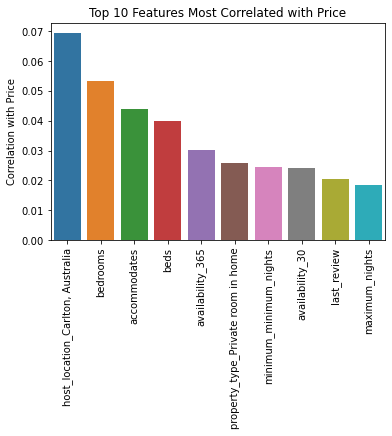

In [7]:
corrmat = df_final.corr()
corrmat = corrmat['price'].abs().sort_values(ascending = False).iloc[1:11]
corrmat.drop(columns = ['price'])
plot = sns.barplot(x=corrmat.index, y=corrmat)
plt.xticks(rotation = 90)
plt.title("Top 10 Features Most Correlated with Price")
plot.set_ylabel("Correlation with Price")
plt.show()


Visualisation of the top 10 features most highly correlated with price is given above. It shows that both location, and size of the accomodation (indicated by bedrooms, beds and accomodates) are highly correlated with the price of an air bnb listing. Also the number of nights an accomodation is available for influences the price of a listing. 

--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking {-}

Make sure you **clearly explain each step** you do, both in text and on the recoded video.

1. Build a machine learning (ML) regression model by taking into account the outcomes of Tasks 1 & 2 (Explain carefully)
2. Fit the model and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Create predictions using the test dataset and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and Comment
5. Make sure your Python code works, so that a marker that can replicate your all of your results and obtain the same RMSE from Kaggle

- Hint: to perform well in this assignment you will need to iterate Tasks 2 & 3, creating new features and training various models in order to find the best one.

Total Marks: 12

In [10]:
#Task 3 code here

In [ ]:
# HAVE TO USE RMSE

`(Task 3 - insert more cells as required)`